In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
# print(iris)

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
data_iris = iris.data
# print(data_iris)

In [5]:
data_iris = pd.DataFrame(data_iris, columns = iris.feature_names)
print(data_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [6]:
data_iris['label'] = iris.target
print(data_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0        0  
1

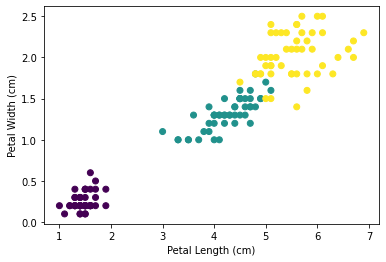

In [7]:
plt.scatter(data_iris.iloc[:, 2], data_iris.iloc[:, 3], c = iris.target)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

In [8]:
x = data_iris.iloc[:, 0:4]
print(x)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [9]:
y = data_iris.iloc[:, 4]
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int32


In [10]:
# K-NN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [11]:
kNN = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 1)
kNN.fit(x, y)

KNeighborsClassifier(n_neighbors=6, p=1)

In [12]:
x_new = np.array([[5.6, 3.4, 1.4, 0.1]])

In [13]:
kNN.predict(x_new)

array([0])

In [14]:
x2_new = np.array([[7.5, 4, 5.5, 2]])

In [15]:
kNN.predict(x2_new)

array([2])

In [16]:
# Test and Train
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=88, shuffle=True, stratify=y)

In [18]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
10                 5.4               3.7                1.5               0.2
130                7.4               2.8                6.1               1.9
46                 5.1               3.8                1.6               0.2
58                 6.6               2.9                4.6               1.3
12                 4.8               3.0                1.4               0.1
..                 ...               ...                ...               ...
64                 5.6               2.9                3.6               1.3
97                 6.2               2.9                4.3               1.3
134                6.1               2.6                5.6               1.4
30                 4.8               3.1                1.6               0.2
94                 5.6               2.7                4.2               1.3

[120 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

In [19]:
# Test and Train Model
from sklearn.neighbors import KNeighborsClassifier

In [20]:
kNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
kNN.fit(x_train, y_train)

KNeighborsClassifier(p=1)

In [21]:
x_predicted = kNN.predict(x_test)

In [22]:
# Get Accuracy
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, x_predicted)

0.9666666666666667

In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [25]:
dt = DecisionTreeClassifier()

In [26]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
x_predicted_dt = dt.predict(x_test)

In [28]:
# Get Accuracy
accuracy_score(y_test, x_predicted_dt)

0.9666666666666667

In [29]:
# Cross Validation
from sklearn.model_selection import cross_val_score

In [30]:
scores_dt = cross_val_score(dt, x, y, cv=10)
print(scores_dt)

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]


In [31]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

In [32]:
nb = GaussianNB()

In [33]:
nb.fit(x_train, y_train)

GaussianNB()

In [34]:
x_predicted_nb = nb.predict(x_test)

In [35]:
accuracy_score(y_test, x_predicted_nb)

0.9666666666666667

In [36]:
scores_nb = cross_val_score(nb, x, y, cv=10)
print(scores_nb)

[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]


In [37]:
# Logistic Regression
from sklearn.datasets import load_breast_cancer

In [38]:
cancer_data = load_breast_cancer()

In [39]:
x = cancer_data.data
print(x)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [40]:
y = cancer_data.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=88)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[1.955e+01 2.321e+01 1.289e+02 ... 1.825e-01 2.576e-01 7.602e-02]
 [1.669e+01 2.020e+01 1.071e+02 ... 8.737e-02 4.677e-01 7.623e-02]
 [1.499e+01 2.520e+01 9.554e+01 ... 2.899e-02 1.565e-01 5.504e-02]
 ...
 [1.276e+01 1.884e+01 8.187e+01 ... 8.312e-02 2.744e-01 7.238e-02]
 [1.882e+01 2.197e+01 1.237e+02 ... 1.708e-01 3.007e-01 8.314e-02]
 [1.126e+01 1.996e+01 7.372e+01 ... 9.314e-02 2.955e-01 7.009e-02]]
[[9.676e+00 1.314e+01 6.412e+01 ... 1.075e-01 2.848e-01 1.364e-01]
 [1.706e+01 2.100e+01 1.118e+02 ... 1.827e-01 2.623e-01 7.599e-02]
 [9.742e+00 1.567e+01 6.150e+01 ... 5.159e-02 2.841e-01 8.175e-02]
 ...
 [1.476e+01 1.474e+01 9.487e+01 ... 1.251e-01 3.109e-01 8.187e-02]
 [1.907e+01 2.481e+01 1.283e+02 ... 2.493e-01 4.670e-01 1.038e-01]
 [1.371e+01 1.868e+01 8.873e+01 ... 1.284e-01 2.849e-01 9.031e-02]]
[0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0
 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()

In [45]:
lr.fit(x_train, y_train)

C:\Python39\Lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
lr_predicted = lr.predict(x_test)

In [47]:
accuracy_score(y_test, lr_predicted)

0.9532163742690059

In [48]:
# Evaluation Metrics
# 1. Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
conf_mat = confusion_matrix(y_test, lr_predicted)
print(conf_mat)

[[ 54   3]
 [  5 109]]


In [50]:
class_rep = classification_report(y_test, lr_predicted)
print(class_rep)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        57
           1       0.97      0.96      0.96       114

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [51]:
# 2. ROC Curve
from sklearn.metrics import roc_curve

In [53]:
y_prob = lr.predict_proba(x_test)
print(y_prob)

[[4.67681216e-04 9.99532319e-01]
 [9.99999991e-01 9.36809721e-09]
 [1.75002911e-03 9.98249971e-01]
 [1.00000000e+00 8.65128989e-11]
 [1.24673017e-03 9.98753270e-01]
 [5.13909621e-03 9.94860904e-01]
 [5.08207323e-01 4.91792677e-01]
 [5.42217006e-03 9.94577830e-01]
 [9.99999998e-01 1.98931919e-09]
 [9.99999570e-01 4.29748718e-07]
 [3.79068132e-03 9.96209319e-01]
 [5.13278752e-02 9.48672125e-01]
 [1.00000000e+00 3.52719305e-11]
 [9.99999664e-01 3.35683042e-07]
 [9.99894592e-01 1.05407831e-04]
 [9.99836058e-01 1.63942396e-04]
 [9.92188406e-01 7.81159440e-03]
 [1.17589698e-03 9.98824103e-01]
 [1.17450310e-03 9.98825497e-01]
 [1.82304129e-04 9.99817696e-01]
 [3.98927256e-04 9.99601073e-01]
 [9.99467501e-01 5.32498956e-04]
 [8.86590992e-01 1.13409008e-01]
 [3.82788522e-02 9.61721148e-01]
 [3.02716257e-02 9.69728374e-01]
 [1.98569622e-03 9.98014304e-01]
 [9.05374656e-05 9.99909463e-01]
 [1.33711184e-03 9.98662888e-01]
 [8.86922817e-04 9.99113077e-01]
 [2.77167963e-02 9.72283204e-01]
 [9.999960

In [54]:
y_prob = y_prob[:, 1]
print(y_prob)

[9.99532319e-01 9.36809721e-09 9.98249971e-01 8.65128989e-11
 9.98753270e-01 9.94860904e-01 4.91792677e-01 9.94577830e-01
 1.98931919e-09 4.29748718e-07 9.96209319e-01 9.48672125e-01
 3.52719305e-11 3.35683042e-07 1.05407831e-04 1.63942396e-04
 7.81159440e-03 9.98824103e-01 9.98825497e-01 9.99817696e-01
 9.99601073e-01 5.32498956e-04 1.13409008e-01 9.61721148e-01
 9.69728374e-01 9.98014304e-01 9.99909463e-01 9.98662888e-01
 9.99113077e-01 9.72283204e-01 3.92578507e-06 2.25188543e-23
 6.94145895e-01 9.98180666e-01 7.88855717e-01 9.92409670e-01
 9.55734676e-01 9.97220854e-01 9.96324807e-01 9.99809362e-01
 9.68797235e-09 8.21394938e-01 4.22541470e-15 9.42527602e-01
 4.72821569e-02 6.56298749e-01 9.98365032e-01 9.18650246e-01
 2.33006427e-03 9.99031063e-01 9.97980513e-01 9.18916592e-02
 9.95794713e-01 7.19442385e-01 9.82775731e-01 9.99825162e-01
 4.24717593e-05 9.96925759e-01 9.98480860e-01 9.96353504e-01
 9.89696369e-01 3.25787649e-02 9.99312657e-01 9.58219726e-01
 7.71982156e-06 2.598625

In [55]:
FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

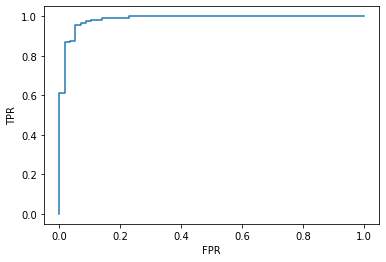

In [56]:
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [58]:
# AUC
from sklearn.metrics import roc_auc_score

In [59]:
roc_auc_score(y_test, y_prob)

0.9855340104647583